In [1]:
import os
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

from IPython.display import display, clear_output
from pygal.style import LightColorizedStyle as LCS, RotateStyle as RS
import ipywidgets as widgets
from ipywidgets import interactive
from IPython.display import display
from IPython.core.display import HTML
from IPython.core.display import SVG 
import pygal.maps.fr


import matplotlib.pyplot as plt
from __future__ import print_function


%matplotlib nbagg


In [2]:
# Declaration des constantes
DATA_DIR = '../data/external/'
PROCESSED_DIR = '../data/processed/'
ANALYSIS_FILENAME = 'Analyse_df.csv'
CITIES_FILENAME = 'base-cc-filosofi-2015.xls'
COMMUNES_DIR = 'PS_communes.csv'

In [3]:
analyse_df = pd.read_csv(os.path.join(DATA_DIR,ANALYSIS_FILENAME),
                         sep = ',',
                        dtype = {'codecommuneetablissement' : str ,'CODGEO' : str }
                        )
analyse_df = analyse_df.drop(['Unnamed: 0'], axis = 1)

In [4]:
# avoir la liste des colonnes et leur indice
list(enumerate(analyse_df.columns))

[(0, 'codecommuneetablissement'),
 (1, 'ambulance'),
 (2, 'analyse_medicale'),
 (3, 'autre'),
 (4, 'autre_specialiste'),
 (5, 'chirurgien'),
 (6, 'dentiste'),
 (7, 'generaliste'),
 (8, 'hopital'),
 (9, 'infirmiers'),
 (10, 'organe'),
 (11, 'radiologue'),
 (12, 'reeducateur_podologue'),
 (13, 'CODGEO'),
 (14, 'LIBGEO'),
 (15, 'NBMENFISC15'),
 (16, 'NBPERSMENFISC15'),
 (17, 'MED15'),
 (18, 'PIMP15'),
 (19, 'TP6015'),
 (20, 'TP60AGE115'),
 (21, 'TP60AGE215'),
 (22, 'TP60AGE315'),
 (23, 'TP60AGE415'),
 (24, 'TP60AGE515'),
 (25, 'TP60AGE615'),
 (26, 'TP60TOL115'),
 (27, 'TP60TOL215'),
 (28, 'PACT15'),
 (29, 'PTSA15'),
 (30, 'PCHO15'),
 (31, 'PBEN15'),
 (32, 'PPEN15'),
 (33, 'PPAT15'),
 (34, 'PPSOC15'),
 (35, 'PPFAM15'),
 (36, 'PPMINI15'),
 (37, 'PPLOGT15'),
 (38, 'PIMPOT15'),
 (39, 'D115'),
 (40, 'D915'),
 (41, 'RD15'),
 (42, '_merge')]

In [5]:
analyse_df

,codecommuneetablissement,ambulance,analyse_medicale,autre,autre_specialiste,chirurgien,dentiste,generaliste,hopital,infirmiers,...,PPAT15,PPSOC15,PPFAM15,PPMINI15,PPLOGT15,PIMPOT15,D115,D915,RD15,_merge
0,01001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,both
1,01002,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,both
2,01004,1.0,4.0,21.0,35.0,9.0,15.0,25.0,8.0,32.0,...,9.5,6.7,2.7,2.0,2.0,-15.8,10398.571429,33801.200000,3.250562,both
3,01005,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,both
4,01007,0.0,0.0,3.0,0.0,0.0,0.0,5.0,0.0,4.0,...,8.1,4.0,2.4,0.8,0.8,-15.1,13620.666667,34606.923077,2.540766,both
5,01008,3.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,both
6,01009,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,both
7,01010,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,both
8,01011,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,both
9,01014,1.0,0.0,1.0,0.0,0.0,2.0,2.0,0.0,5.0,...,12.8,4.7,2.4,1.2,1.1,-17.3,12562.500000,34165.600000,2.719650,both


In [6]:
(analyse_df.generaliste/analyse_df.NBPERSMENFISC15).mean()

0.000642164172143855

In [7]:
100_000 * analyse_df.generaliste.sum()/analyse_df.NBPERSMENFISC15.sum()

144.52075190279163

144 généralistes pour 100 000 habitants.

In [8]:
analyse_df.autre_specialiste.sum() 

51562.0

In [9]:
analyse_df.NBPERSMENFISC15.sum()

67108701.5

In [10]:
analyse_df.generaliste.sum()

96986.0

In [11]:
%matplotlib inline
import seaborn as sns

sns.set()

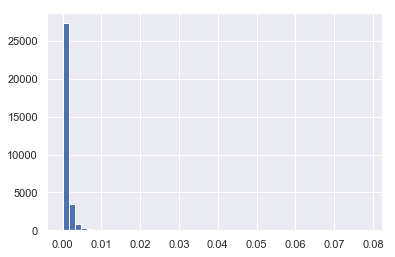

In [12]:
(analyse_df.generaliste / analyse_df.NBPERSMENFISC15).hist(bins = 50)

In [13]:
analyse_df['generaliste_habitants'] = 100_000 * analyse_df.generaliste / analyse_df.NBPERSMENFISC15

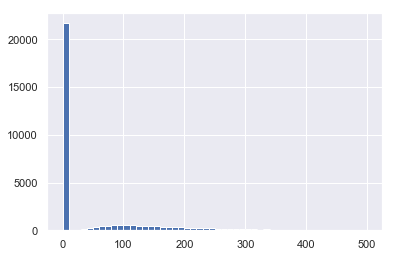

In [14]:
analyse_df.query('generaliste_habitants < 500').generaliste_habitants.hist(bins = 50)

In [15]:
analyse_df[analyse_df.generaliste_habitants == 0].shape

(21672, 44)

In [16]:
analyse_df.dropna(subset= ['CODGEO','NBPERSMENFISC15']).loc[analyse_df.generaliste_habitants == 0].count()

codecommuneetablissement    21672
ambulance                   21672
analyse_medicale            21672
autre                       21672
autre_specialiste           21672
chirurgien                  21672
dentiste                    21672
generaliste                 21672
hopital                     21672
infirmiers                  21672
organe                      21672
radiologue                  21672
reeducateur_podologue       21672
CODGEO                      21672
LIBGEO                      21672
NBMENFISC15                 21672
NBPERSMENFISC15             21672
MED15                       21672
PIMP15                        143
TP6015                         73
TP60AGE115                      4
TP60AGE215                      6
TP60AGE315                      8
TP60AGE415                      7
TP60AGE515                      4
TP60AGE615                      3
TP60TOL115                     13
TP60TOL215                     24
PACT15                        142
PTSA15        

### Analyse du nombre de médecins par habitants

On prend les 2 premiers caractères des codes commune pour récupérer le numéro du département

In [17]:
analyse_df.loc[analyse_df.CODGEO.isnull()]['codecommuneetablissement'].str[:2].value_counts()

97    67
98     6
29     1
Name: codecommuneetablissement, dtype: int64

In [18]:
analyse_df.loc[(analyse_df.CODGEO.isnull()) & (analyse_df.codecommuneetablissement.str[:2] == '98')]

,codecommuneetablissement,ambulance,analyse_medicale,autre,autre_specialiste,chirurgien,dentiste,generaliste,hopital,infirmiers,...,PPSOC15,PPFAM15,PPMINI15,PPLOGT15,PIMPOT15,D115,D915,RD15,_merge,generaliste_habitants
20472,98733,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only,NaN
20473,98735,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only,NaN
20474,98738,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only,NaN
20475,98749,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only,NaN
20476,98812,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only,NaN
20477,98818,0.0,0.0,0.0,0.0,0.0,0.0,3.0,6.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only,NaN


In [19]:
analyse_df.columns

Index(['codecommuneetablissement', 'ambulance', 'analyse_medicale', 'autre',
       'autre_specialiste', 'chirurgien', 'dentiste', 'generaliste', 'hopital',
       'infirmiers', 'organe', 'radiologue', 'reeducateur_podologue', 'CODGEO',
       'LIBGEO', 'NBMENFISC15', 'NBPERSMENFISC15', 'MED15', 'PIMP15', 'TP6015',
       'TP60AGE115', 'TP60AGE215', 'TP60AGE315', 'TP60AGE415', 'TP60AGE515',
       'TP60AGE615', 'TP60TOL115', 'TP60TOL215', 'PACT15', 'PTSA15', 'PCHO15',
       'PBEN15', 'PPEN15', 'PPAT15', 'PPSOC15', 'PPFAM15', 'PPMINI15',
       'PPLOGT15', 'PIMPOT15', 'D115', 'D915', 'RD15', '_merge',
       'generaliste_habitants'],
      dtype='object')

On supprime toute ligne ayant un missing code commune, ou pas de population.

In [20]:
dept_df = (analyse_df
           .dropna(subset = ['CODGEO','NBPERSMENFISC15'])
           .assign(dep = lambda df: df.CODGEO.str[:2])
           .groupby('dep')[['NBPERSMENFISC15','ambulance', 'analyse_medicale', 'autre',
            'autre_specialiste', 'chirurgien', 'dentiste', 'generaliste',
           'hopital', 'infirmiers', 'organe', 'radiologue',
           'reeducateur_podologue']].sum())
           

In [21]:
metiers = ['ambulance', 'analyse_medicale', 'autre',
       'autre_specialiste', 'chirurgien', 'dentiste', 'generaliste',
       'hopital', 'infirmiers', 'organe', 'radiologue',
       'reeducateur_podologue']
for i in metiers : 
    dept_df[i+'_habitant'] = 100_000* dept_df[i] / dept_df.NBPERSMENFISC15

In [22]:
dept_df.to_csv("/Users/Utilisateur/Desktop/table.csv")

In [23]:
dept_df.head()

,NBPERSMENFISC15,ambulance,analyse_medicale,autre,autre_specialiste,chirurgien,dentiste,generaliste,hopital,infirmiers,...,autre_habitant,autre_specialiste_habitant,chirurgien_habitant,dentiste_habitant,generaliste_habitant,hopital_habitant,infirmiers_habitant,organe_habitant,radiologue_habitant,reeducateur_podologue_habitant
dep,,,,,,,,,,,,,,,,,,,,,
01,611797.0,82.0,39.0,718.0,203.0,39.0,368.0,597.0,138.0,1070.0,...,117.359189,33.180941,6.374663,60.150671,97.581387,22.556502,174.894614,0.163453,6.211211,156.751341
02,518914.0,65.0,36.0,238.0,263.0,25.0,261.0,567.0,119.0,986.0,...,45.865018,50.682772,4.817754,50.297352,109.266661,22.932509,190.012218,0.963551,11.369899,108.303110
03,332244.5,59.0,25.0,307.0,157.0,35.0,192.0,392.0,59.0,774.0,...,92.401831,47.254356,10.534411,57.788767,117.985399,17.758007,232.960967,0.601966,9.029495,158.016160
04,156728.5,23.0,18.0,279.0,118.0,15.0,134.0,342.0,48.0,631.0,...,178.014847,75.289434,9.570691,85.498170,218.211748,30.626210,402.607056,0.000000,3.828276,267.341294
05,135089.5,33.0,14.0,235.0,138.0,21.0,134.0,379.0,66.0,483.0,...,173.958746,102.154498,15.545250,99.193498,280.554743,48.856499,357.540742,1.480500,18.506250,441.188990


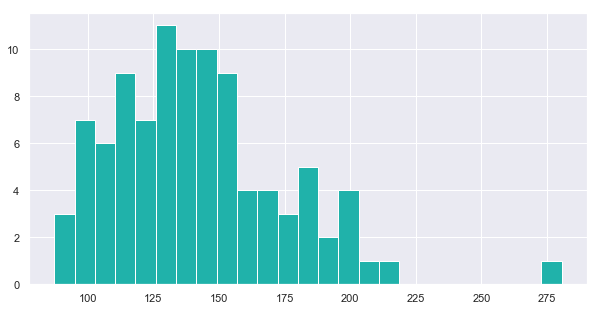

In [24]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10,5))
dept_df.generaliste_habitant.hist(bins=25,color = 'lightseagreen')

In [25]:
dept_df.generaliste_habitant.describe()

count     97.000000
mean     142.256348
std       33.114357
min       87.292227
25%      117.985399
50%      136.252689
75%      160.325195
max      280.554743
Name: generaliste_habitant, dtype: float64

En moyenne, il y a 142 medecins pour 100 000 habitants </p>
**Qui a le plus de médecins ? Le moins de médecins?**

In [26]:
dept_df.sort_values(by = 'generaliste_habitant', ascending = False).tail(5)

,NBPERSMENFISC15,ambulance,analyse_medicale,autre,autre_specialiste,chirurgien,dentiste,generaliste,hopital,infirmiers,...,autre_habitant,autre_specialiste_habitant,chirurgien_habitant,dentiste_habitant,generaliste_habitant,hopital_habitant,infirmiers_habitant,organe_habitant,radiologue_habitant,reeducateur_podologue_habitant
dep,,,,,,,,,,,,,,,,,,,,,
72,554255.5,101.0,37.0,432.0,246.0,54.0,239.0,532.0,116.0,632.0,...,77.942393,44.383863,9.742799,43.120907,95.984614,20.928976,114.026834,0.180422,8.118999,134.955810
89,329374.0,48.0,23.0,287.0,142.0,24.0,155.0,315.0,70.0,510.0,...,87.134989,43.112085,7.286550,47.058966,95.635964,21.252436,154.839180,0.910819,7.893762,134.801168
28,429705.0,52.0,28.0,369.0,160.0,25.0,188.0,397.0,85.0,426.0,...,85.872866,37.234847,5.817945,43.750945,92.388965,19.781013,99.137781,0.698153,7.214252,106.352032
53,301157.0,55.0,12.0,214.0,91.0,13.0,136.0,277.0,75.0,406.0,...,71.059281,30.216797,4.316685,45.159169,91.978603,24.903954,134.813403,0.664105,6.641054,117.878714
27,592263.5,67.0,37.0,472.0,152.0,17.0,240.0,517.0,148.0,622.0,...,79.694258,25.664252,2.870344,40.522504,87.292227,24.988877,105.020823,0.337688,5.065313,104.007760


In [27]:
dept_df.sort_values(by = 'generaliste_habitant', ascending = False).head(5)

,NBPERSMENFISC15,ambulance,analyse_medicale,autre,autre_specialiste,chirurgien,dentiste,generaliste,hopital,infirmiers,...,autre_habitant,autre_specialiste_habitant,chirurgien_habitant,dentiste_habitant,generaliste_habitant,hopital_habitant,infirmiers_habitant,organe_habitant,radiologue_habitant,reeducateur_podologue_habitant
dep,,,,,,,,,,,,,,,,,,,,,
05,135089.5,33.0,14.0,235.0,138.0,21.0,134.0,379.0,66.0,483.0,...,173.958746,102.154498,15.545250,99.193498,280.554743,48.856499,357.540742,1.480500,18.506250,441.188990
04,156728.5,23.0,18.0,279.0,118.0,15.0,134.0,342.0,48.0,631.0,...,178.014847,75.289434,9.570691,85.498170,218.211748,30.626210,402.607056,0.000000,3.828276,267.341294
2A,123172.0,13.0,19.0,190.0,142.0,17.0,167.0,251.0,44.0,679.0,...,154.255837,115.285942,13.801838,135.582762,203.780080,35.722404,551.261650,0.811873,20.296821,347.481570
06,1113414.5,194.0,219.0,1807.0,1626.0,172.0,1431.0,2263.0,248.0,3587.0,...,162.293557,146.037257,15.447976,128.523564,203.248655,22.273825,322.162142,0.179628,15.717417,300.067944
34,1084819.0,153.0,176.0,1835.0,1349.0,230.0,1146.0,2196.0,212.0,3855.0,...,169.152642,124.352542,21.201694,105.639743,202.430083,19.542431,355.358820,0.737450,22.676594,363.839498


In [28]:
pd.concat([
    dept_df.sort_values(by = 'generaliste_habitant')[['NBPERSMENFISC15','generaliste_habitant']].head(5),
    dept_df.sort_values(by = 'generaliste_habitant')[['NBPERSMENFISC15','generaliste_habitant']].tail(5)
],axis = 0)

,NBPERSMENFISC15,generaliste_habitant
dep,,
27,592263.5,87.292227
53,301157.0,91.978603
28,429705.0,92.388965
89,329374.0,95.635964
72,554255.5,95.984614
34,1084819.0,202.430083
06,1113414.5,203.248655
2A,123172.0,203.780080
04,156728.5,218.211748


In [29]:
dept_df['infirmiers_habitant'] = 100_000 * dept_df.infirmiers / dept_df.NBPERSMENFISC15

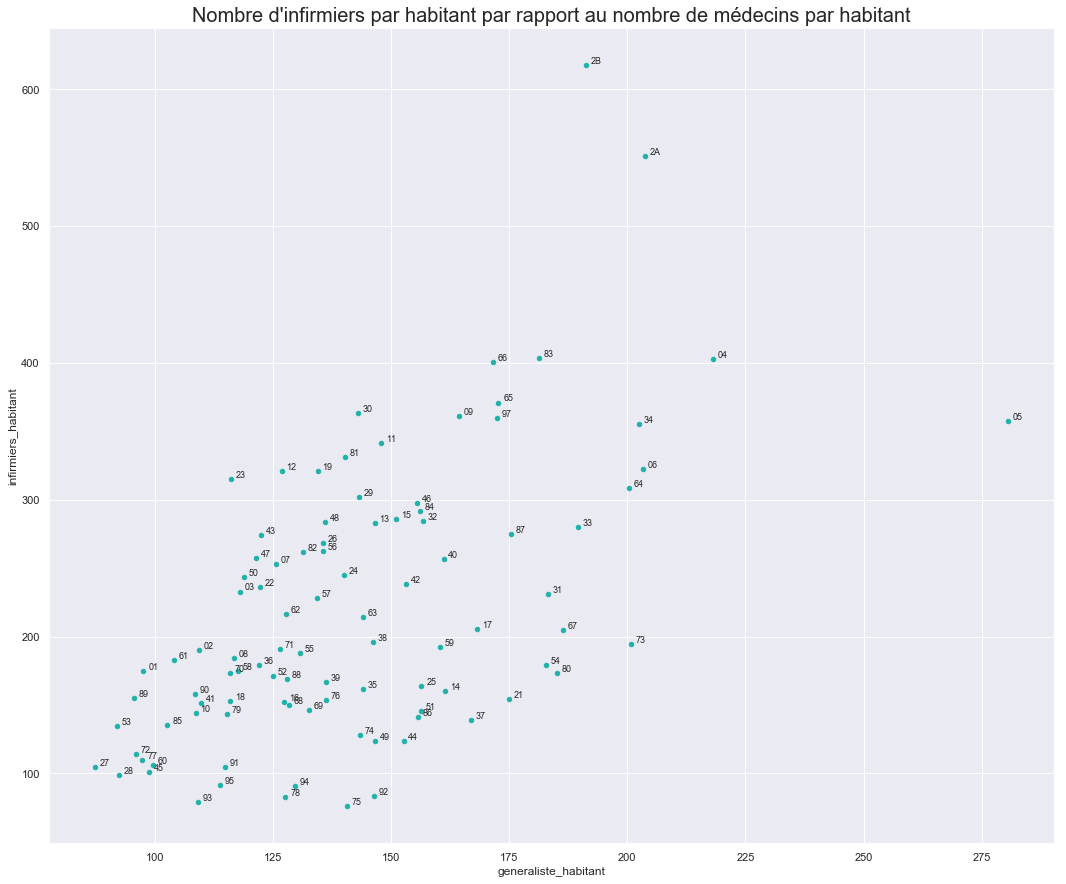

In [30]:
dept_df.plot(kind = 'scatter', x = 'generaliste_habitant', y ='infirmiers_habitant', color = 'lightseagreen',figsize = (18,15));

for i in range(dept_df.shape[0]):
    plt.text(dept_df['generaliste_habitant'].iloc[i] + 1,
             dept_df['infirmiers_habitant'].iloc[i] + 1,
             dept_df.index[i], fontsize = 9
            )
plt.title("Nombre d'infirmiers par habitant par rapport au nombre de médecins par habitant", fontsize = 20); 

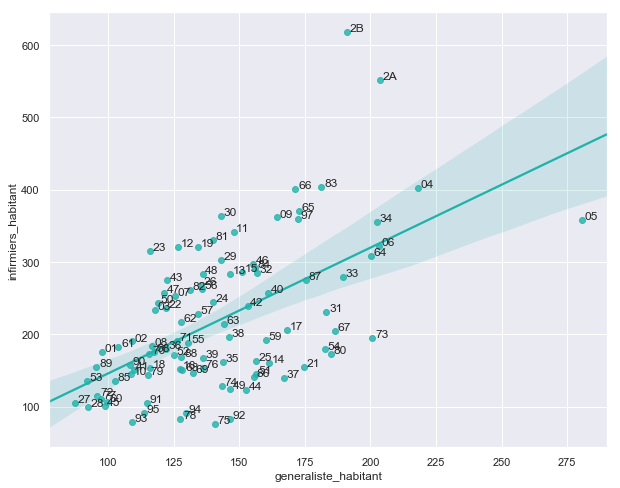

In [31]:
plt.figure(figsize = (10,8))
sns.regplot(x = 'generaliste_habitant', y ='infirmiers_habitant', color = 'lightseagreen', data = dept_df);

for i in range(dept_df.shape[0]):
    plt.text(dept_df['generaliste_habitant'].iloc[i] + 1,
             dept_df['infirmiers_habitant'].iloc[i] + 1,
             dept_df.index[i]
            )

**Exo : Créer une fonction qui calcule directement les metiers/habitants**

Pour le nombre d'entreprises d'ambulance pour 100 000 habitants

In [32]:
dept_df['ambulance_habitant'] = 100_000 * dept_df.ambulance / dept_df.NBPERSMENFISC15

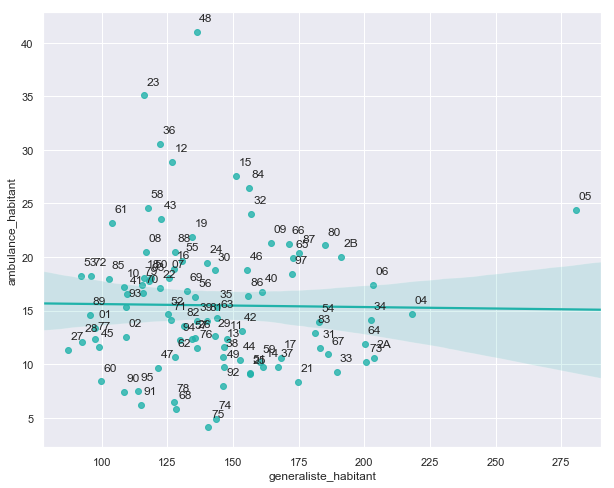

In [33]:
plt.figure(figsize = (10,8))
sns.regplot(x = 'generaliste_habitant', y ='ambulance_habitant', color = 'lightseagreen', data = dept_df);

for i in range(dept_df.shape[0]):
    plt.text(dept_df['generaliste_habitant'].iloc[i] + 1,
             dept_df['ambulance_habitant'].iloc[i] + 1,
             dept_df.index[i]
            )

Peut etre pas de relation entre généralistes et habitants

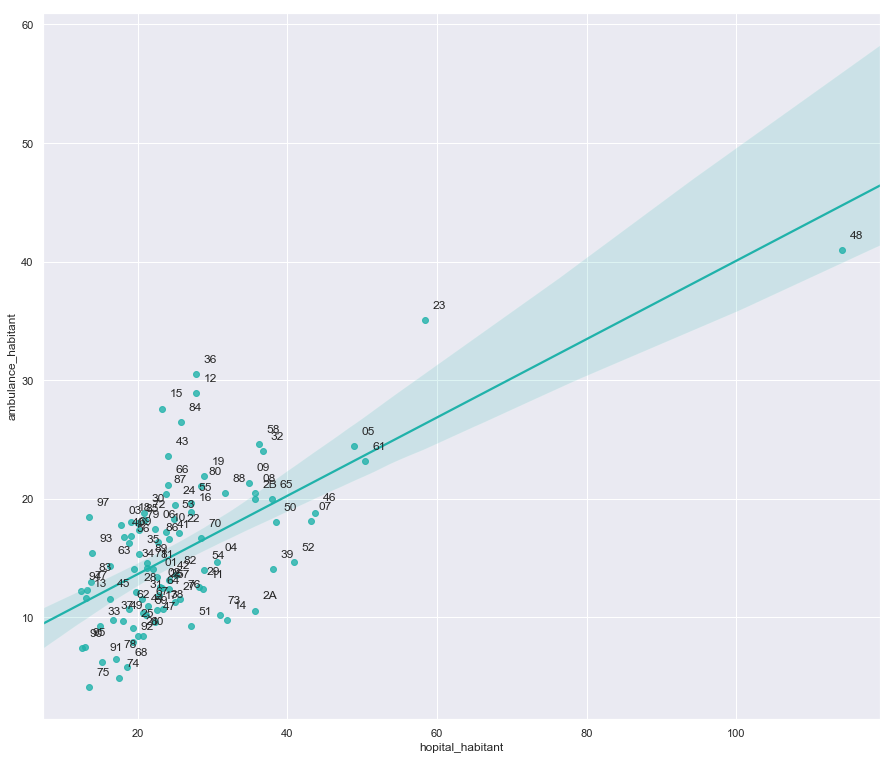

In [34]:
dept_df['hopital_habitant'] = 100_000 * dept_df.hopital / dept_df.NBPERSMENFISC15
plt.figure(figsize = (15,13))
sns.regplot(x = 'hopital_habitant', y ='ambulance_habitant', color = 'lightseagreen', data = dept_df);

for i in range(dept_df.shape[0]):
    plt.text(dept_df['hopital_habitant'].iloc[i] + 1,
             dept_df['ambulance_habitant'].iloc[i] + 1,
             dept_df.index[i]
            )

In [35]:
dictionnaire = dept_df['generaliste_habitant'].to_dict()

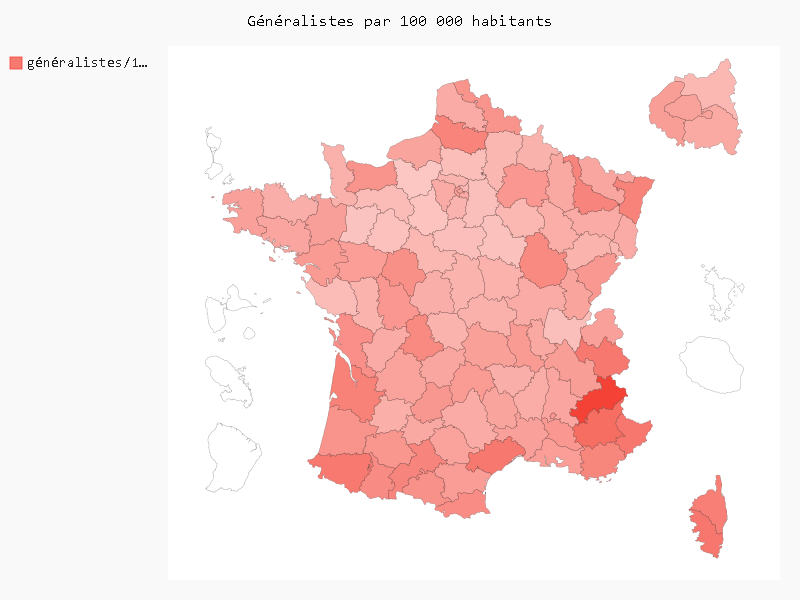

In [36]:
fr_chart = pygal.maps.fr.Departments(human_readable = True)
fr_chart.title = 'Généralistes par 100 000 habitants'
fr_chart.add(title = 'généralistes/100 000 hab', values = dictionnaire)

In [37]:
html_pygal = """
<!DOCTYPEg>
<html>
  <head>
    <script type="text/javascript" src="http://kozea.github.com/pygal.js/javascripts/svg.jquery.js"></script>
    <script type="text/javascript" src="http://kozea.github.com/pygal.js/latest/pygal-tooltips.min.js"></script>
    <!-- ... -->
  </head>
  <body>
    <figure>
    </figure>

  </body>
</html>
"""

HTML(html_pygal.format(fr_chart(human_readable = True)))

**regler les couleurs**

Comment caractériser un désert médical ? Trouver une démarche, une facon, un indice permettant de visualiser où est ce qu'il y a un désert médical
Faire un tableau de bord permettant de visualiser les différentes métriques : generalistes par habitants, les ambulanciers, les infirmiers.... et spécialistes = somme de tout
de facon interactif dans Dash (menu deroulant) ou ipywidget. **29 mars** Mettre tout ca sur github

# Analyse des déserts médicaux avec widgets

In [38]:
occupation = ['ambulance_habitant', 'analyse_medicale_habitant', 'autre_habitant',
               'autre_specialiste_habitant', 'chirurgien_habitant', 'dentiste_habitant', 
              'generaliste_habitant','hopital_habitant', 'infirmiers_habitant',
              'organe_habitant', 'radiologue_habitant','reeducateur_podologue_habitant'
             ]

clean_occup = ['Ambulanciers','Laboratoires d\'analyse',
            'Autres spécialistes','Autres' 'Chirurgiens', 'Dentistes',
             'Généralistes','Hopitaux, cliniques','Infirmiers',
             'Dons d\'organe','Radiologues','Rééducateurs, podologues'
             ]

dict_pro =  dict(zip(clean_occup,occupation))

Dropdown(description='Profession :', index=5, options=('Ambulanciers', "Laboratoires d'analyse", 'Autres spéci…

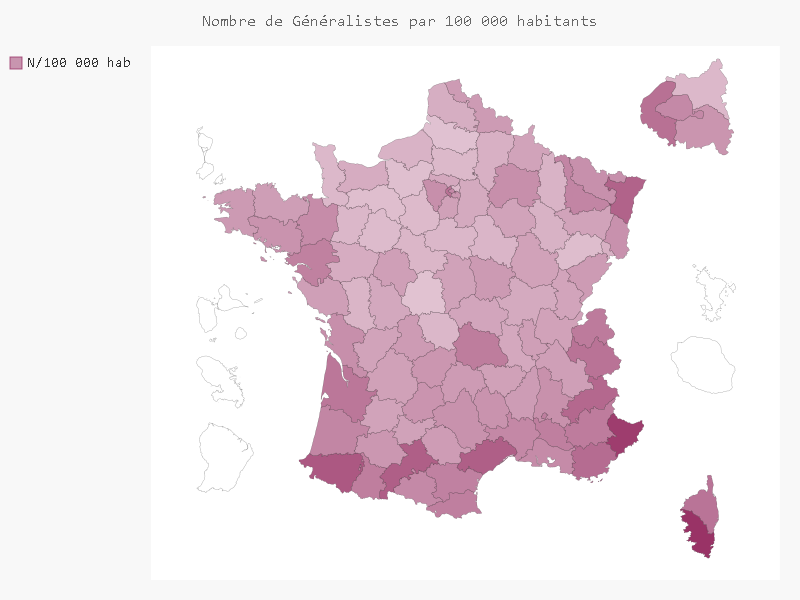

None

In [44]:


fr_style = RS('#993366', base_style=LCS)

def map_fr(liste):
    dictionnaire = dept_df[dict_pro[liste]].to_dict()
    fr_chart = pygal.maps.fr.Departments(human_readable = True, style = fr_style)
    fr_chart.title = 'Nombre de ' + liste + ' par 100 000 habitants'
    fr_chart.add(title = 'N/100 000 hab', values = dictionnaire)
    display(fr_chart)

liste = widgets.Dropdown(
    options= clean_occup,
    value = 'Généralistes',
    description='Profession :',
    disabled=False,
)

def update_y(change):
    clear_output()
    display(liste)
    display(map_fr(liste.value))
    display(HTML(html_pygal))
    
display(liste)
display(map_fr(liste.value))
display(HTML(html_pygal))
liste.observe(update_y, names = 'value')

